___
# Predictive Power - Interest rates and GDP Growth
___

### TOC
- [Intro](#intro)
- [Method](#method)
___
## Intro <a id="intro"></a>
___

The consensus across all schools of economics on this subject is that changes in interest rates lead to changes in GDP Growth. Given the physics-envy hued paradigm upon which economic thinking is based, this makes perfect sense; the more expensive money is, the less of it is demanded and vice verca. The big societal application of this idea is monetary policy; rates are raised with the intention of slowing the economy, lowered to get it moving. While it makes perfect valid sense in the paradigm, there is reason to doubt that this idea is actually sound. For example:
<img src="images/gdp_interest/mystery_country.png"/>



This mystery country's nominal GDP growth (in green) and interest rate (red) appears to be a counter example to the idea. There are parts of this plot that appear to be in line with the theory, for example, falling $r$ from 1960 until before that spike in 1973ish, accelerating ($\delta$GDP is already a rate of change) GDP growth coincides with declining $r$, and then the spike that follows directly after coincides with a large decelerating impulse in GDP growth. It all more or less looks fine until just before 1990 where things stop working pretty much completely. For an idea that is taken as so naturally self evident at face value, that's at least a little weird. This is, of course, the infamous macroeconomic mystery of Japanese nominal GDP growth and interest rate.

[The paper by Richard Werner](https://www.sciencedirect.com/science/article/pii/S0921800916307510) which inspired me to attempt this exercise in analysis and gesticulation, goes into more examples at greater depth so I won't spend too much time here, but I did want to raise a quote from the paper to our attention:

> As an empirical matter, low interest rates are a sign that monetary policy has been tight - in the sense that the quantity of money has grown slowly; high interest rates are a sign that monetary policy has been easy - in the sense that the quantity of money has grown rapidly. The broadest facts of experience run in precisely the opposite direction from that which the financial community and acedemic economists have all generally taken for granted.
>
> – Milton Friedman, 1968

#### Predictive Power, Causality, more Gesticulation
I want to see if a fast-and-loose (very ***very*** loose) approach can hint at what this empirical study rigorously uncovers. What would constitute a success would be if I can show with my primitive sticks and stones and limited knowledge of statistics that one could be suspicious of the hypothesis that interest rates determine GDP growth. In particular, I'm quite curious about predictive power - whether or not [PPS](https://8080labs.com/blog/posts/rip-correlation-introducing-the-predictive-power-score-pps/) out of the box has something to say either in favour of or agaisnt the null hypothesis, $H_0$, and i'm also interested in trying my hand at [Granger causality](https://en.wikipedia.org/wiki/Granger_causality). These two things could work syngergistically and It's also something I want to apply across to my health data as well.

In the study, a few countries are analysed - Germany, Japan, United Kingdom, United States, and it is found that all but Germany comfortably destroy the $H_0$. In the case of Germay, it is only shaken violently off it's pedestol of hot air. Since the questions in question are with regards to the journey and the start and end points are part of the assumptions, whatever I yield on Germany, given that I take it on assumption to be diffferent, should be an interesting point of reference.

Werner does a bunch of other tests to counter some of the technical blindspots of the particular test. While this is a great idea for determining the facts in the first place, that isn't my goal. I will not be runing a bootstrap simulation to confirm significance without the issue of the F-stat's "non-standard asymptotic distribution" getting in the way because I have no idea what that means or why it's important. Clearly it's important enough that he does the work of implementing a suite of other tests, but that's at least two levels beyond my current knowledge and goal for this exercise.

## Method Discussion <a id="method"></a>

I'm going to roughly copy his method but modify bits and pieces to see if I can fill in the gaps I create for the sake of my curiosity. Thus, for German, Japanese and American (why not) data, I traverse the following path of thinking:

The two series are either correlated or not. Since one would expect uncorrelated series to not have much to do with each other, we would like to establish correlation first, then gesture in the direction of causality/forecasts. Using one timeseries to *forecast* another is sensible to me, but causality between timeseries struck me as a very strange subject and having done a bit of reading, it appears that the prima facie ontological murkiness is not lost on anyone.

For forecasting, I think we can just ballpark the intuition as something like: real event, $a$ registers as a change in timeseries $a$ which could also be more or less equivalent to the event's ontological manifestation (changing an interest rate, *announcing* that you're a willing buyer of last resort, similar). Real event $a$ also causes a second real event, $b$ which registers in timeseries $b$. So at the forecasting level, causality is time ordering the events then establishing confidence that, with temporality, $a \implies b$ but also that $\lnot b \implies \lnot a$... to some degree. In english, what we want is 1. every time $a$ occurs, we'll see an occurrence of $b$, but also, that 2. the absense of $b$ means there wasn't $a$. To make intuitive sense of that second part, if $b$ was to regularly occur without $a$ having happened, then we wouldn't be quite as confident that occurrences of $a$ make for a good signal that $b$ will come.

From the perspective of causality, there's holes in that thinking; $a$ could still have explanatory power regarding $b$ without being the only factor, just to name one. Apparently, Granger had a little rant in his nobel lecture on the whack conclusions one could and some have reach using his statistical tool. One last relevant thing I came across in my reading:

>An associational concept is any relationship that can be defined in terms of a joint distribution of observed variables, and a causal concept is any relationship that cannot be defined from the distribution alone... Every claim invoking causal concepts must be traced to some premise that invoke such concepts; it cannot be inferred or derived from statistical associations alone
>
> – Pearl

The point that the authors suggest and that I definitely take away is that in a kind of "can't ought from is" sort of way, you can't derive statement about causality from observational data only; assumptions must be smuggled in as axioms since to speculate on causality necessarily involves theoretical matheme-ising. The point i'm making (to myself) is that Granger causality test is not a test for causality proper ("proper") but rather, is a [kind of weak space-time contiguous forecast](https://en.wikipedia.org/wiki/Humean_definition_of_causality); which is already quite demanding timewise, so i'm keeping the scope of this notebook limited to "mere" forecasting.


My intent for interest rates and maybe 10yr bond yields:
1. Grab correlations against GDP growth with lags
2. Repeat but with PPS
3. Do a granger causality and contextualise the relevant statistics

## The Data

I use two sources for the data. I `get` the majority of it from the Federal Reserve Bank of St. Louis, and a few bits and pieces from The World Bank. Though the FRED sources much of the data I'm grabbing from The World Bank, WB also seems to impose lower bounds on the years i'm allowed to pull from, at least as far as I could find. FRED data goes back further than those lower bounds. On the other hand, the FRED doesn't have GDP data for Germany to a timescale I found satisfying, whereas The World Bank does. It's all a mess really.

Another significant problem is the matter of dates. The start and end of each series doesn't necessarily align and I can't hunt data forever, so i'm simply going to take the largest timespan I can for each country and perform the analysis on the available dates. The difficulty of acquiring nice data is also why i'm choosing years as my unit of time. It's as simple as I can make things.


So, From FRED, I will use:

- Annual-averaged non-seasonally adjusted nominal GDP for Japan and the US, measured in USD
- Annual-averaged interest rate/discount rate percentage per annum for Japan, Germany and the US

From The World Bank, I will use:

- German GDP


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import requests as re

### 1. Grab FRED and WB data

In [2]:
# --- Get FRED data

countries = ['DE', 'JP', 'US'] # de : germany, jp : japan, us : united states

fred_base = "https://api.stlouisfed.org/fred/series/observations\
?series_id={sid}\
&api_key={key}\
&units={units}\
&frequency=a&file_type=json\
"

# --- FRED API Key
with open("data/fred_key/auth.txt") as f:
    fred_key = f.read()

# --- Units
untransformed = "lin"
annual_change = "ch1"
percent_change= "pch"

# --- Dataset IDs
r_id = "INTDSR{c}M193N"    # Interest rate ID format c = country id
g_id = "MKTGDP{c}A646NWDB" # GDP ID format c = country id

# --- Get WB data
wb_base = 'http://api.worldbank.org/v2/country\
/{c}\
/indicator\
/{sid}\
?format=json\
{key}{units}\
'
wb_g_id = "NY.GDP.MKTP.CD"

In [3]:
def get_data(src="", key="", units="", series_id="", c=""):
    """
    Pull data from either source
    """
    url = src.format(sid=series_id, key=key, units=units, c=c)
    url = url.format(c=c)
    get = re.get(url)
    
    if get.status_code != 200:
        return get.status_code
    return get.json()

In [4]:
# --- Construct df

# 1. Grab FRED data and put it in a nice DF
# 2. Overwrite/append the data with WB for relevant fields

date_upper, date_lower = None, None
all_data = {}
realtime = None
cols = []

# --- FREDDY
for c in countries:
    dgdp = get_data(src=fred_base, key=fred_key, units=untransformed, series_id=g_id, c=c)
    r = get_data(src=fred_base, key=fred_key, units=untransformed, series_id=r_id, c=c)
    gets = {"r":r['observations'], "g":dgdp['observations']}
    
    for label, content in gets.items():
        data_store = {}
        for obs in content:
            # --- Realtime should be the same for all data
            if realtime == None:
                realtime = (obs['realtime_start'], obs['realtime_end'])
            
            d = pd.to_datetime(obs['date'])
            v = float(obs['value']) if obs['value'] != "." else np.nan

            # --- Earliest and Latest date DF index bounds
            if date_lower == None or d < date_lower:
                date_lower = d
            if date_upper == None or d > date_upper:
                date_upper = d

            # --- Append data
            data_label = "{c}_{l}".format(c=c, l=label).lower()
            entry = {"date" : d, data_label : v}
            data_store[d] = v
            all_data[data_label] = data_store
        cols.append(data_label)
        
df = pd.DataFrame(
    index=pd.date_range(start=date_lower, end=date_upper,freq="AS"),
    columns=cols,
    data = all_data)

print("Real time: ", realtime)

Real time:  ('2021-07-22', '2021-07-22')


In [5]:
display(df.iloc[15:20])

,de_r,de_g,jp_r,jp_g,us_r,us_g
1963-01-01,4.00,NaN,5.992500,6.949813e+10,3.23,6.386000e+11
1964-01-01,4.00,NaN,6.448333,8.174901e+10,3.55,6.858000e+11
1965-01-01,4.67,NaN,5.722500,9.095028e+10,4.04,7.437000e+11
1966-01-01,5.83,NaN,5.480000,1.056281e+11,4.50,8.150000e+11
1967-01-01,4.13,NaN,5.600000,1.237819e+11,4.19,8.617000e+11


In [7]:
# --- Take note of how .shift(lag) works

note = pd.DataFrame()
note["original jp_r"] = df.de_r.dropna()
note["shift jp_r by 1 "] = note["original jp_r"].shift(1).head()
note["shift jp_r by -1"] = note["original jp_r"].shift(-1).head()
note.head(3)

,original jp_r,shift jp_r by 1,shift jp_r by -1
1950-01-01,5.50,NaN,7.00
1951-01-01,7.00,5.5,6.13
1952-01-01,6.13,7.0,4.71


### Correlation and Correlation with Lags

Take the interest rate and $\Delta$gdp timeseries, shift rates backwards and forwards in time and assess the correlations of the shifted rates to $\Delta$gdp.

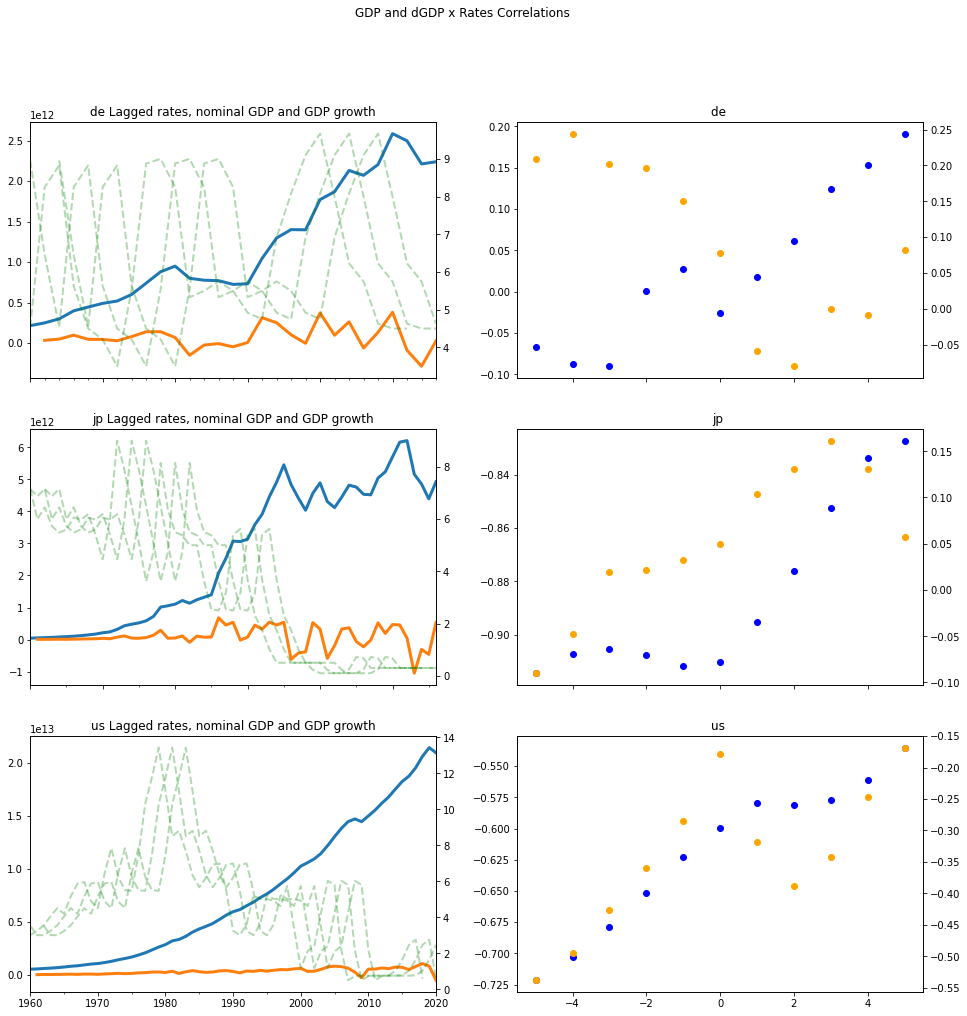

In [78]:
_, ax = plt.subplots(3, 2, figsize=(16, 16))
# _.tight_layout(h_pad=2 )

save_cdfs = {} # for the PPS section

for i, c in enumerate(countries):
    c = c.lower()
    cdf = df[["{}_r".format(c), "{}_g".format(c)]].dropna()
    
    # --- GDP Growth
    cdf['{}_dg'.format(c)] = cdf["{}_g".format(c)] - cdf["{}_g".format(c)].shift(1)
    
    # --- Lag rates forwards and backwards by 5 years
    deltas = range(-5, 6)
    for d in deltas:
        cdf["{c}_r_lag_{d}".format(c=c, d=d)] = cdf["{}_r".format(c)].shift(d)
    
    save_cdfs[c] = cdf
    
    # --- Correlate lagged rates to nominal GDP and dGDP
    corr_gdp = cdf.corr()["{}_g".format(c)].iloc[3:]
    corr_dgdp = cdf.corr()["{}_dg".format(c)].iloc[3:]
    
    # --- Plot
    ax01 = ax[i, 0].twinx()
    ax11 = ax[i, 1].twinx()
    
    # Nomainal GDP and dGDP
    cdf.plot(y=["{}_g".format(c), '{}_dg'.format(c)], ax=ax[i,0], lw=3);
    cdf.plot(
        y=["{}_r_lag_-2".format(c), "{}_r_lag_0".format(c), "{}_r_lag_2".format(c)], 
        ax=ax01,
        **{"alpha":0.3, "linestyle":"--", "lw":2}, c="g", legend=False
    )

    ax[i, 1].plot(deltas, corr_gdp, '.', c='blue', ms=12);
    ax11.plot(deltas, corr_dgdp, '.', c='orange', ms=12);
    
    # Titles, labels, similar
    ax[i, 0].set(title="{} Lagged rates, nominal GDP and GDP growth".format(c))
    ax[i, 1].set(title="{} ".format(c))
    ax[i, 0].get_legend().remove()
    _.suptitle("GDP and dGDP x Rates Correlations")

## Repeat for PPS

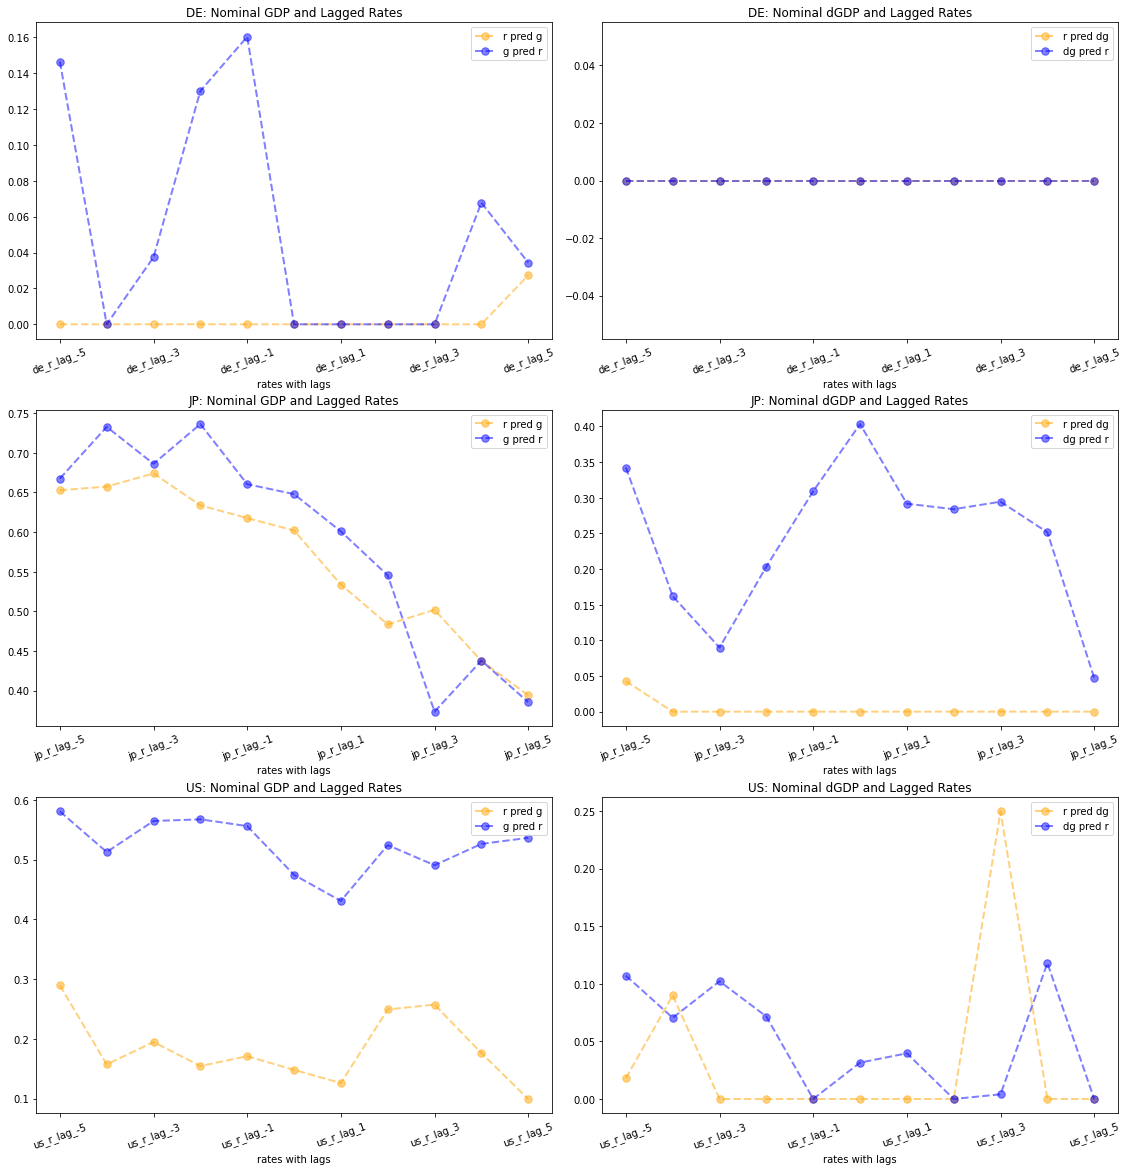

In [151]:
import ppscore as pps

_, ax = plt.subplots(3, 2, figsize=(16,16))
_.tight_layout(pad=2, h_pad=5)

save_pscores = {}

for i, c in enumerate(countries):
    c = c.lower()
    cdf = save_cdfs[c]
    deltas = range(-5, 6)
    
    # --- All PPS scores
    pscores = pps.matrix(cdf)
    save_pscores[c] = pscores
    
    # --- Select "x=rates with lags predict y=GDP"
    r_pred_g = pd.concat([
        pscores.loc[
            (pscores['x'] == "{c}_r_lag_{l}".format(c=c,l=l))
            &(pscores['y'] == "{}_g".format(c))] for l in deltas], ignore_index=True
    )
    
    # --- Select "x=GDP predicts y=rates with lags"
    g_pred_r = pd.concat([
        pscores.loc[
            (pscores['y'] == "{c}_r_lag_{l}".format(c=c,l=l))
            &(pscores['x'] == "{}_g".format(c))] for l in deltas], ignore_index=True
    )
    
    # --- Select "x=rates with lags predict y=dGDP"
    r_pred_dg = pd.concat([
        pscores.loc[
            (pscores['x'] == "{c}_r_lag_{l}".format(c=c,l=l))
            &(pscores['y'] == "{}_dg".format(c))] for l in deltas], ignore_index=True
    )
    
    # --- Select "x=dGDP predicts y=rates with lags"
    dg_pred_r = pd.concat([
        pscores.loc[
            (pscores['y'] == "{c}_r_lag_{l}".format(c=c,l=l))
            &(pscores['x'] == "{}_dg".format(c))] for l in deltas], ignore_index=True
    )
    
    # --- Plot
    r_pred_g.plot(
        x='x', y='ppscore', kind="line", ax=ax[i, 0],
        style=".--", c="orange", lw=2, ms=15, alpha=0.5,
        **{"label" : "r pred g"}
    )
    g_pred_r.plot(
        x='y', y='ppscore', kind="line", ax=ax[i, 0],
        style=".--", c="b", lw=2, ms=15, alpha=0.5,
        **{
            "title" : "{}: Nominal GDP and Lagged Rates".format(c.upper()),
            "xlabel" : "rates with lags",
            "label" : "g pred r"
          }
    )
    
    r_pred_dg.plot(
        x='x', y='ppscore', kind="line", ax=ax[i, 1],
        style=".--", c="orange", lw=2, ms=15, alpha=0.5,
        **{"label" : "r pred dg"}
    )
    dg_pred_r.plot(
        x='y', y='ppscore', kind="line", ax=ax[i, 1],
        style=".--", c="b", lw=2, ms=15, alpha=0.5,
        **{
            "title" : "{}: Nominal dGDP and Lagged Rates".format(c.upper()),
            "xlabel" : "rates with lags",
            "label" : "dg pred r"
          }
    )
    
    ax[i, 0].tick_params(axis='x', labelrotation = 20)
    ax[i, 1].tick_params(axis='x', labelrotation = 20)
#     _.suptitle("PPS Scores for Nominal GDP and dGDP")

### Granger Causality

On a quick read, it seems I more or less intuited the gist of Granger causality in the introduction. In a line, 

"X causes Y" is tested by checking for:
$$
\mathbb{P}[Y_{t+1} \in A_{rbitrary} | \mathcal{I}(t)] \neq \mathbb{P}[Y_{t+1} \in A_{rbitrary} | \mathcal{I}_{-X}(t)]
$$

which reads: 

The probablility that "$Y$ happens at time $t+1$ given the status quo $\mathcal{I}$ at time $t$" is not the same as the probability that "$Y$ happens at time $t+1$ given the alternate-reality status quo $\mathcal{I}_{-X}$ at time $t$, where everything is the same except that $X$ didn't happen"

Sensible.

Note that for [`statsmodels.tsa.stattools.grangercausalitytests`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html),
```
x: The data for test whether the time series in the second column Granger causes the time series in the first column. Missing values are not supported.
```

### Critical F
I couldn't find a prepackaged solution for determining the critical value for an F test of arbitrary DoF that doesn't involve either dragging my poor eyeballs across a literal table of values or using an online calculator. Either would be tolerable for one or two hard coded examples, but i'm trying to do 30 of them, so I figured i'd just make a scrappy one myself.

[F-distirbution formula](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3665.htm)

[Resolving significance from F-dist](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3673.htm)

Note that the cumulative distribution function for the F is 🍌 so I think approximating AUC then grabbing the corresponding x value with calculus is probably easier. I'm thinking I just do one of these...

$$
\int_{x_a}^{\infty} f(t) dt = F(\infty) - F(x_a)
$$

... and use a simple optimiser to find the answer. Since the CDF across the entire function is 1, I would want the arithmetic on the right to equal the significance level $a$; for a 5% significant result, find the $x_{\text{5%}}$ value that gives $F(\infty) - F(x_{5\%}) = 0.05$

___
### Clarify Corresponding Causality Convictions
___

In the above plots, I shifted the $r$ates timeseries backwards and forwards in time by up to $10t$s and took the PPS scores of the hypotheses below. The left side column uses $yield$ as the target to be explained and $r$ as the explanatory variable. The right side column of plots are predictive scores for the opposite causality - $r$ dependent, $yield$ independent.

Again, the `df.shift(lag)` moves the dataframe column down by `lag` so I can interpret `.shift(lag)` as pulling the timeseries `lag` steps forward (positive lag) or backward (negative lag) in time...

#### $H_0$ - "Change in interest rate will cause a change in yields"
... So, a person who believes that "$\Delta r$  causes $\Delta yield$" would expect today's $r$ values to say more about a future value of $yield$ than the present. This belief would correspond to an exepctation that positive lags (bringing past values of $r$ forward in time) would speak more about $yield$ than negative ones.

### 👀
Starting with an eyeball test on the left columns of plots, we see that America's plot is in favour of $H_0$, Japan's doesn't and Germany appears more or less balanced. Taking into consideration the range of the scores, Germany's scores suggest that there may not be much going on at all. 

#### $H_1$ - "Change in yield will cause a change in interest rate"
A person who believes that "$\Delta yield$ causes $\Delta r$" would expect today's $yield$ to say something about yesterday's $r$, or equivalently, that today's $r$ will say something about tomorrow's $yield$. This corresponds to an expectation that negative lags (pulling r back in time) would speak more about $yield$ than the positive lags.

### 👀
This, we see quite clearly in the right side Japanese and German plots, not so for the American plot. At least superficially, it appears that the Japanese and German series would not reject $H_1$ and the American one would. We also see the magnitude of Germay's scores being of significantly smaller, just like on the left side plots. Notice that America's plot has a waviness to it on the right. 

#### Summary

- $H_0$ - Changes of $r$ today will cause a change in $yield$ tomorrow

- $H_1$ - Changes of $yield$ today will cause a change in $r$

From eyeball inspection of the shapes of the plots, I observe that:

$H_0$ could be rejected by Japan's plot ⭕️, not rejected by America's plot ❌, and indifferent for Germany's plot ❓.

$H_1$ doesn't appear to be rejected by Japan's plot ❌ nor by Germany's plot ❌, but by America's plot ⭕️. 

There are two more observations that I have made:

1. The magnitude differences in PPS

Germany's PPS and correlation scores are significantly smaller than those of Japan and America. There's two ways of interpreting this: The first is that Germany's series just don't say much about each other, which I doubt given the shape of the plots and the theory. Second, that Japan's and America's correlations and PPS are suspiciously high. In the case of the correlations, I have already mentioned the spuriousness. The case of PPS may be due to the fact Germany's $yield$ timeseries fluctuates relatively far from the median (horizontal red dashed line) particularly as compared to Japan or America's $yield$ plots. This can result in lower PPS values because PPS is a relativised score where the baseline is that of the naive strategy "guess the median", measured with mean absolute error. So, the more the series adheres to the median, the better the naive strategy should perform relative to the "actual" model, the lower the typical PPS score for those datasets, I suspect. Perhaps that's something I should check.

$$
PPS = 1-\frac{MAE_{model}}{MAE_{naive}}
$$

2. Waviness in the American and Japanese plots

Given that I am playing with lags, given the way that the America plot looks, given that it is almost certainly not stationary, the waviness of the positive lags on the $H_1$ plot suggests to me that there's actually a bit of spuriousness, broadly speaking, going on here. Not only in the stationarity sense, but also perhaps that the high positive lags may be assocaiting the $n^{th}$ fluctuation of yield with the ${n+1}^{th}$ of the rates

This is all wrong. go thorugh it carefully later when youve cleared your brain a little


What does it mean that Japan's and America's scores have a pattern to them whereas the German scores don't?

The scores in the first plot are those for which yield was used as the target to be explained and lags as the explanatory variable. Since the points are ordered by lags $[-L, L] \in \mathbb{Z}$.

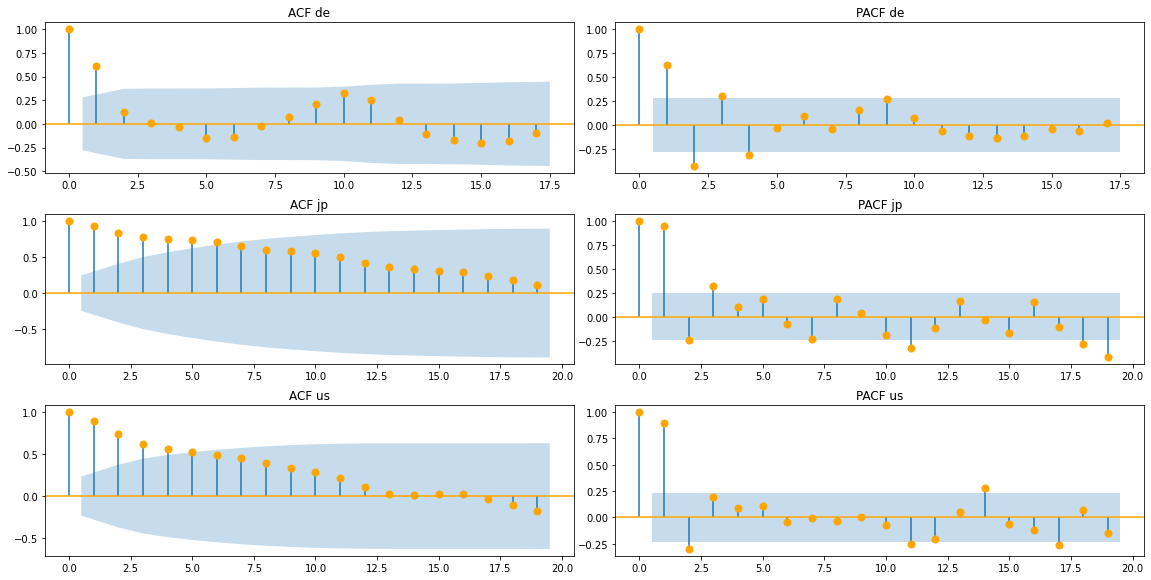

In [142]:
# --- Cursory check for autcorrelation in yields which like, surely.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

_, ax = plt.subplots(3, 2, figsize=(16, 8))
_.tight_layout(h_pad=2)

for i, c in enumerate(countries):
    c = c.lower()
    plot_acf(df["{}_r".format(c)].dropna(), ax=ax[i, 0], c='orange', markersize=7)
    plot_pacf(df["{}_r".format(c)].dropna(), ax=ax[i, 1], c='orange', markersize=7)
    ax[i, 0].set(title="ACF {}".format(c))
    ax[i, 1].set(title="PACF {}".format(c))

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.65273503, 0.626135  , 0.60055571, 0.57519486, 0.55012109,
        0.52631967, 0.50505272, 0.4890884 , 0.48000194, 0.47364851,
        0.452953  , 0.42640103, 0.40026253, 0.37595304, 0.35341532,
        0.33245818, 0.3125398 , 0.2932015 , 0.2747092 , 0.25735137,
        0.24123379]),
 <matplotlib.lines.Line2D at 0x12ed6f970>)

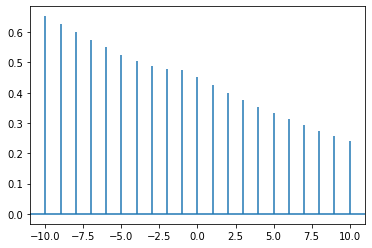

In [148]:
xcortest = df[["us_r", "us_g"]].dropna()
plt.xcorr(x=xcortest["us_r"], y=xcortest["us_g"])

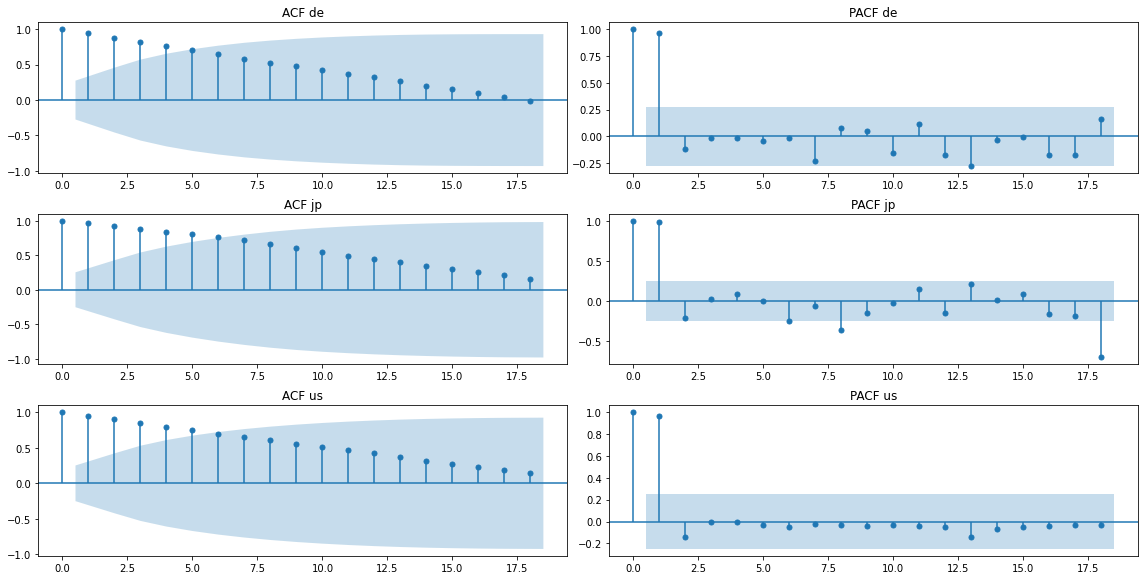

In [133]:
# --- Check for autocorrelation in rates

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

_, ax = plt.subplots(3, 2, figsize=(16, 8))
_.tight_layout(h_pad=2)

for i, c in enumerate(countries):
    c = c.lower()
    plot_acf(df["{}_g".format(c)].dropna(), ax=ax[i, 0])
    plot_pacf(df["{}_g".format(c)].dropna(), ax=ax[i, 1])
    ax[i, 0].set(title="ACF {}".format(c))
    ax[i, 1].set(title="PACF {}".format(c))

In [25]:
# --- Critical F estimation tool

from scipy.special import gamma
from scipy.integrate import simps
from scipy.optimize import minimize_scalar

def sig_x(df1, df2, significance):
    upper = 100
    lower = 0
    
    # --- General F distribution
    def general_f(x, df1, df2):
        numerator = gamma((df1 + df2)/2) * ((df1/df2)**(df1/2)) * (x ** (df1 / 2 -1))
        denominator = gamma(df1/2) * gamma(df2/2) * (1 + (df1 * x) / df2) ** ((df1+df2)/2)
        return numerator/denominator
    
    # --- AUC
    def auc(lower, upper):
        x = np.linspace(lower, upper, 1000)
        y = general_f(x, df1, df2)
        return simps(y, x, dx=0.001, axis=0)
    
    # --- Minimizer
    min_me = lambda x: abs(auc(lower=x, upper=upper) - significance)
    return minimize_scalar(min_me, method="Bounded", bounds=(0, 20))#, options={"disp":3})

In [ ]:
# --- Get ganger causality and relevant statistics

from statsmodels.tsa.stattools import grangercausalitytests as granger

maxlag = 5 # test g-causality for lags 1 thorugh maxlag
g_results = {}
for c in countries:
    h0 = df[["{}_y".format(c), "{}_r".format(c)]].dropna() # This will test "r g-causes y"
    h1 = df[["{}_r".format(c), "jp_y".format(c)]].dropna() # This will test "y g-causes r"
    test_h0 = granger(h0, maxlag=maxlag, verbose=False)
    test_h1 = granger(h1, maxlag=maxlag, verbose=False)
    g_results[c] = {"h0" : test_h0, "h1" : test_h1}

<ipython-input-25-3106041d007c>:14: RuntimeWarning: overflow encountered in multiply
  denominator = gamma(df1/2) * gamma(df2/2) * (1 + (df1 * x) / df2) ** ((df1+df2)/2)
<ipython-input-25-3106041d007c>:15: RuntimeWarning: invalid value encountered in true_divide
  return numerator/denominator


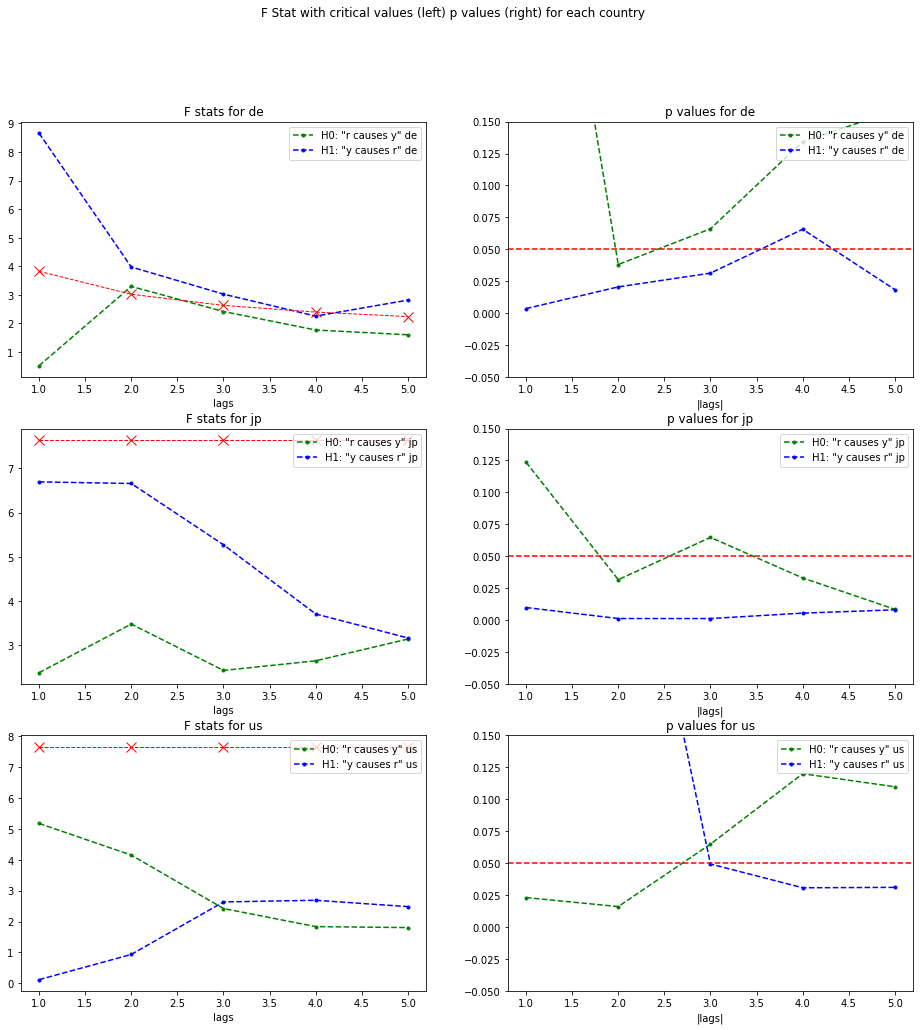

In [43]:
# --- Plot the Statistics

_, ax = plt.subplots(3, 2, figsize=(16, 16))
_.suptitle("F Stat with critical values (left) p values (right) for each country")

significance = 0.05

for i, c in enumerate(countries):
    lags = range(1, maxlag+1)
    tests = g_results[c]
    
    # --- F test statistic
    h0_ftest = [tests["h0"][l][0]["params_ftest"][0] for l in lags]
    h1_ftest = [tests["h1"][l][0]["params_ftest"][0] for l in lags]
    
    # --- P val of F stat
    h0_pvals = [tests["h0"][l][0]["params_ftest"][1] for l in lags]
    h1_pvals = [tests["h1"][l][0]["params_ftest"][1] for l in lags]
    
    # --- DoFs
    h0_dofs = [tests["h0"][l][0]["params_ftest"][2:] for l in lags]
    h0_crit = [sig_x(dof[1], dof[0], significance).x for dof in h0_dofs]
    h1_dofs = [tests["h1"][l][0]["params_ftest"][2:] for l in lags]
    h1_crit = [sig_x(dof[1], dof[0], significance).x for dof in h1_dofs]
    
    ax[i, 0].plot(lags, h0_ftest, '.--', lw=1.5, c="g", label='H0: "r causes y" {}'.format(c))
    ax[i, 0].plot(lags, h1_ftest, '.--', lw=1.5, c="b", label='H1: "y causes r" {}'.format(c))
    
    ax[i, 1].plot(lags, h0_pvals, '.--', lw=1.5, c="g", label='H0: "r causes y" {}'.format(c))
    ax[i, 1].plot(lags, h1_pvals, '.--', lw=1.5, c="b", label='H1: "y causes r" {}'.format(c))
    
    # --- Significant Values
    ax[i, 0].plot(lags, h0_crit, "x--", lw=1, ms=10, c="r")
    ax[i, 1].axhline(y=significance, color="r", linestyle="--")
    
    ax[i, 0].set(
        title="F stats for {}".format(c),
        xlabel="lags",
    )
    ax[i, 0].legend(loc="upper right")
    ax[i, 1].legend(loc="upper right")
    
    ax[i, 1].set(
        title="p values for {}".format(c),
        ylim=(-0.05, 0.15),
        xlabel="|lags|",
    )

The German results are compelling. The F statistics for $H_0$: "r causes y" are below the critical values, x'ed in red, whereas the $H_1$: "y causes r" are not. The correpsonding p values on the right suggest that $H_0$ can be comfortably rejected whereas $H_1$ is not, though, looking at the p values for $H_1$, we may be slightly less confident about that.

The results for Japan and the US are less clear. Neither hypothesis can be rejected for both countries, though the 

#### GDP Japan
World Bank, Gross Domestic Product for Japan [MKTGDPJPA646NWDB], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MKTGDPJPA646NWDB, July 17, 2021.

#### Interest rate Japan
International Monetary Fund, Interest Rates, Discount Rate for Japan [INTDSRJPM193N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/INTDSRJPM193N, July 17, 2021.

#### GDP Germnay
??

#### Interest rate Germany
International Monetary Fund, Interest Rates, Discount Rate for Germany [INTDSRDEM193N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/INTDSRDEM193N, July 17, 2021.

#### GDP USA
U.S. Bureau of Economic Analysis, Gross Domestic Product [GDP], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDP, July 17, 2021.

#### Interest rate USA
International Monetary Fund, Interest Rates, Discount Rate for United States [INTDSRUSM193N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/INTDSRUSM193N, July 18, 2021.